## Install and Import packages

In [ ]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cach

In [ ]:
import medmnist
from medmnist import INFO, BloodMNIST
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL.Image as Image

In [ ]:
# Load the BloodMNIST dataset with high resolution for all splits
train_data = BloodMNIST(split='train', download=True, as_rgb=True, size=224)

100%|██████████| 1540731655/1540731655 [00:54<00:00, 28121101.58it/s]


## Exploring Data Structure

In [ ]:
img, label = train_data[0]

In [ ]:
type(train_data[0][0])

PIL.Image.Image

In [ ]:
im = np.array(img)

In [ ]:
im.shape

(224, 224, 3)

## Manually crop image to isolate stained cell pixels

In [ ]:
cropped_im = im[90:155, 85:135, :]
cropped_im.shape

(65, 50, 3)

In [ ]:
cropped_im = cropped_im.reshape(3250, 3)

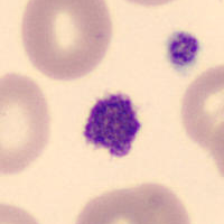

In [ ]:
img

(array([123., 469., 609., 409., 318., 262., 260., 220., 328., 252.]),
 array([123. , 131.1, 139.2, 147.3, 155.4, 163.5, 171.6, 179.7, 187.8,
        195.9, 204. ]),
 <BarContainer object of 10 artists>)

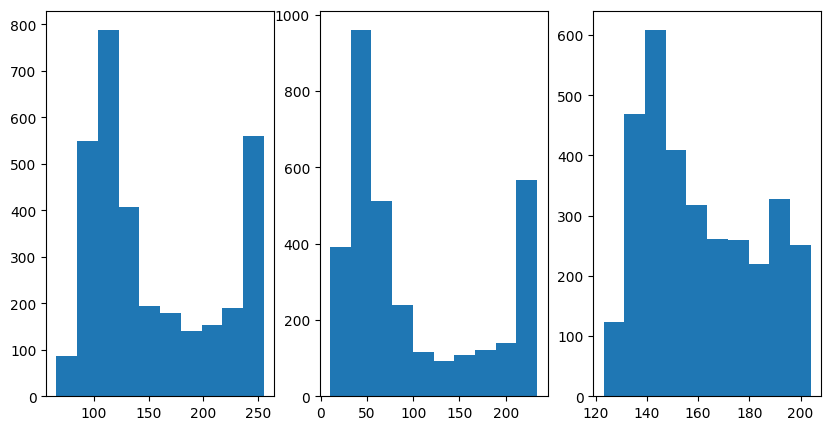

In [ ]:
# histogram of values in cropped image
fig, axes = plt.subplots(1, 3 , figsize=(10, 5))
axes[0].hist(cropped_im[:, 0])
axes[1].hist(cropped_im[:, 1])
axes[2].hist(cropped_im[:, 2])

In [ ]:
# quartiles of RGB values
red_quan = np.quantile(cropped_im[:, 0], [0, 0.25, 0.5, 0.75, 1])
gre_quan = np.quantile(cropped_im[:, 1], [0, 0.25, 0.5, 0.75, 1])
blu_quan = np.quantile(cropped_im[:, 2], [0, 0.25, 0.5, 0.75, 1])

print(red_quan)
print(gre_quan)
print(blu_quan)

[ 66. 107. 131. 209. 255.]
[ 10.  42.  64. 170. 234.]
[123. 142. 156. 179. 204.]


In [ ]:
# purple pixels RGB values between 1st and 3rd quartile
red_range = (red_quan[0], red_quan[3])
gre_range = (gre_quan[0], gre_quan[3])
blu_range = (blu_quan[0], blu_quan[3])

## Estimate Cell Size

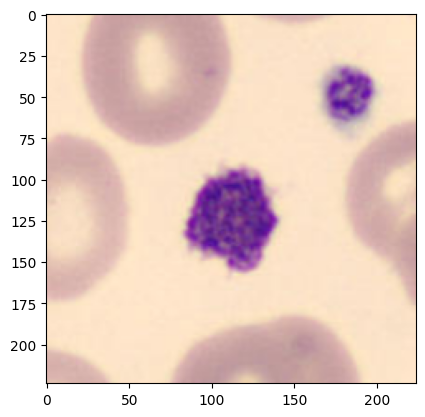

stained cell size:  9686


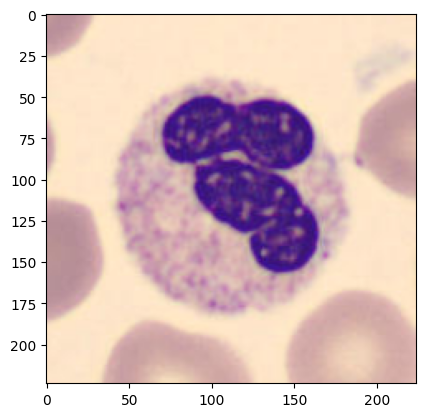

stained cell size:  11950


In [ ]:
# count the number of pixels in an image which are within the range of values to create stained cell purple color
def count_stained_cell_pixs(new_im, red_range, gre_range, blu_range):
  im_size = new_im.shape

  r_min, r_max = red_range
  g_min, g_max = gre_range
  b_min, b_max = blu_range

  plt.imshow(new_im)
  plt.show()
  # r_min = 200
  cell_pix_count = 0
  none_count = 0
  for i in range(im_size[0]):
    for j in range(im_size[1]):
      if (new_im[i, j, 0] >= r_min) & (new_im[i, j, 0] <= r_max):
        if (new_im[i, j, 1] >= g_min) & (new_im[i, j, 1] <= g_max):
          if (new_im[i, j, 2] >= b_min) & (new_im[i, j, 2] <= b_max):
            cell_pix_count += 1
      else:
        none_count += 1
  return cell_pix_count


print("stained cell size: ", count_stained_cell_pixs(np.array(train_data[0][0]), red_range, gre_range, blu_range))
print("stained cell size: ", count_stained_cell_pixs(np.array(train_data[2][0]), red_range, gre_range, blu_range))

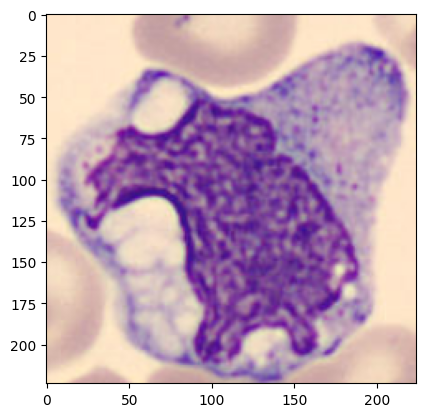

In [ ]:
plt.imshow(np.array(train_data[1000][0]))

In [ ]:
np.array([[[5, 10, 20]]]).shape

(1, 1, 3)

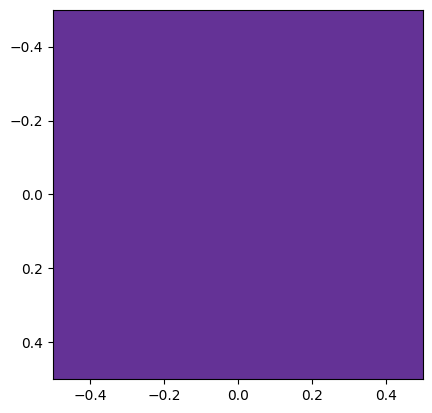

In [ ]:
plt.imshow(np.array([[[100, 50, 150]]]))

In [ ]:
for i in range(5):
  im, label = train_data[i]
  im = Image.open(im[])
  print(im.shape)

AttributeError: read